# Data Preparation

## Load data from excel in pandas DataFrame

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
sns.set()

import warnings
warnings.filterwarnings('ignore')

data_file_path = 'data/study1_data.xlsx'
df = pd.read_excel(data_file_path)

# df.columns
## columns 0-5: automatically created by MS Forms
## column "ID": this is an automatically generated ID. It starts at 14. The previous IDs were used for testing and piloting the form
## columns 6-13 correspond to participant sheet's sections - redundant
## columns 14-19: consent form
## columns 20-28: prequestionnaire
## columns 29-38: main tasks based on the visualization
## columns 39-50: postquestionnaire
## columns 26, 46: attention check questions


In [2]:
## average duration
average_completion_time = (df['Completion time'] - df['Start time']).mean()
age = df[[list(df.columns)[20]]]
gender = df[[list(df.columns)[21]]]
education = df[[list(df.columns)[23]]]
ai_programming_experience = df[[list(df.columns)[25]]]
attention_check_question = df[[list(df.columns)[26]]]
freq_watching = df[[list(df.columns)[27]]]
platforms = df[[list(df.columns)[28]]]

In [3]:
# age.groupby(age.columns[0])[age.columns[0]].count().sum()
age.groupby(age.columns[0])[age.columns[0]].count()

What is your age?
18-25    15
26-40    11
41-50     4
Name: What is your age?, dtype: int64

In [4]:
gender.groupby(gender.columns[0])[gender.columns[0]].count()

What is your gender?
Man                  13
Prefer not to say     2
Woman                15
Name: What is your gender?, dtype: int64

In [5]:
education.groupby(education.columns[0])[education.columns[0]].count()

What is the highest level of education you have completed?
A-levels or equivalent     4
Bachelor's degree          9
Doctoral degree            1
GCSEs or equivalent        2
Master's degree           14
Name: What is the highest level of education you have completed?, dtype: int64

In [6]:
ai_programming_experience.groupby(ai_programming_experience.columns[0])[ai_programming_experience.columns[0]].count()

Do any of these statements describe you? (select any that apply)
I have programming experience;I have some familiarity with machine learning, artificial intelligence or statistics;    18
I have some familiarity with machine learning, artificial intelligence or statistics;                                   7
Name: Do any of these statements describe you? (select any that apply), dtype: int64

In [7]:
freq_watching.groupby(freq_watching.columns[0])[freq_watching.columns[0]].count()

How often do you watch films/tv series?
1-4 times a month (i.e., once a week or less often on average)        7
5-30 times a month (i.e., more often than once a week on average)    10
Every day or more often                                              10
Less than once a month (i.e., a few times in a year)                  3
Name: How often do you watch films/tv series?, dtype: int64

In [8]:
platforms.groupby(platforms.columns[0])[platforms.columns[0]].count()

To what extent do you believe the existing streaming platforms or movie database sites (e.g. IMDb, Simkl, Letterboxd) are informative about the diversity/inclusivity of characters in films/tv series?
I do not know     6
Moderately        8
Not at all        1
Slightly         12
Very much         3
Name: To what extent do you believe the existing streaming platforms or movie database sites (e.g. IMDb, Simkl, Letterboxd) are informative about the diversity/inclusivity of characters in films/tv series?, dtype: int64

# Visualize Demographics

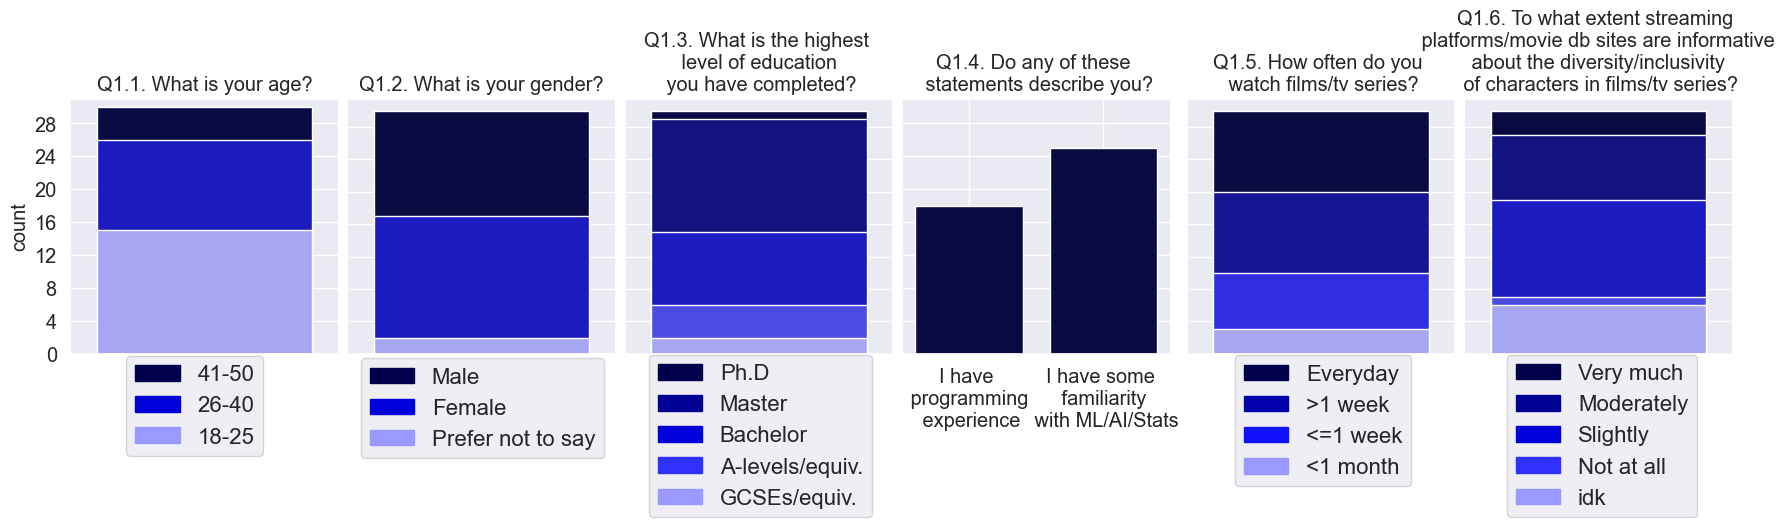

In [11]:
##
x1_legend_loc = 0.21
y1_legend_loc = -0.4
x2_legend_loc = 0.05
y2_legend_loc = -0.41
x3_legend_loc = 0.09
y3_legend_loc = -0.64
x5_legend_loc = 0.18 
y5_legend_loc = -0.52
x6_legend_loc = 0.16 
y6_legend_loc = -0.64
ylim_max = 31
ytickperiod = 4

## Plot in common figure
fig = plt.figure(constrained_layout=True,figsize=(20, 5))
gs = GridSpec(1, 7, figure=fig)
ax1 = fig.add_subplot(gs[0, 0:1])
ax2 = fig.add_subplot(gs[0, 1:2])
ax3 = fig.add_subplot(gs[0, 2:3])
ax4 = fig.add_subplot(gs[0, 3:4])
ax5 = fig.add_subplot(gs[0, 4:5])
ax6 = fig.add_subplot(gs[0, 5:6])
## AX1
cmap = plt.get_cmap('seismic')
colors = cmap(np.linspace(0, 0.4, 3))
bar1 = sns.barplot(ax=ax1, x=[age.columns[0]],  y=[age.groupby(age.columns[0])[age.columns[0]].count().sum()], 
                   color=colors[0])
bar2 = sns.barplot(ax=ax1, x=[age.columns[0]],  y=[age.groupby(age.columns[0])[age.columns[0]].count()[0]+
                                                   age.groupby(age.columns[0])[age.columns[0]].count()[1]], 
                   color=colors[1], estimator=sum, ci=None)
bar3 = sns.barplot(ax=ax1, x=[age.columns[0]],  y=[age.groupby(age.columns[0])[age.columns[0]].count()[0]], 
                   color=colors[2], estimator=sum, ci=None)
## LEGEND
top_bar = mpatches.Patch(color=colors[0], label='41-50')
middle_bar = mpatches.Patch(color=colors[1], label='26-40')
bottom_bar = mpatches.Patch(color=colors[2], label='18-25')
ax1.legend(handles=[top_bar, middle_bar, bottom_bar],loc=[x1_legend_loc, y1_legend_loc])
## TITLE
ax1.set_title('Q1.1. '+age.columns[0], fontsize="large")
## AXES
ax1.tick_params(axis='both', labelsize="large")
ax1.set_ylim([0,ylim_max])
ax1.yaxis.set_ticks(np.arange(0, ylim_max, 3))
ax1.yaxis.set_label_text('count')
ax1.get_xaxis().set_visible(False)
ax1.yaxis.label.set_size('large')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))

## AX2
cmap = plt.get_cmap('seismic')
colors = cmap(np.linspace(0, 0.4, 3))
bar1 = sns.barplot(ax=ax2, x=[gender.columns[0]],  y=[gender.groupby(gender.columns[0])[gender.columns[0]].count().sum()], 
                   color=colors[0])
bar2 = sns.barplot(ax=ax2, x=[gender.columns[0]],  y=[gender.groupby(gender.columns[0])[gender.columns[0]].count()[1]+
                                                      gender.groupby(gender.columns[0])[gender.columns[0]].count()[2]], 
                   color=colors[1], estimator=sum, ci=None)
bar3 = sns.barplot(ax=ax2, x=[gender.columns[0]],  y=[gender.groupby(gender.columns[0])[gender.columns[0]].count()[1]], 
                   color=colors[2], estimator=sum, ci=None)
## LEGEND
top_bar = mpatches.Patch(color=colors[0], label='Male')
middle_bar = mpatches.Patch(color=colors[1], label='Female')
bottom_bar = mpatches.Patch(color=colors[2], label='Prefer not to say')
ax2.legend(handles=[top_bar, middle_bar, bottom_bar],loc=[x2_legend_loc, y2_legend_loc])
## TITLE
ax2.set_title('Q1.2. '+gender.columns[0], fontsize="large")
## hide axes ticks but show grid lines
ax2.get_xaxis().set_visible(False)
ax2.grid(True)
ax2.yaxis.set_ticks(np.arange(0, ylim_max, ytickperiod))
for tick in ax2.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

## AX3
cmap = plt.get_cmap('seismic')
colors = cmap(np.linspace(0, 0.4, 5))
bar1 = sns.barplot(ax=ax3, x=[education.columns[0]],  y=[education.groupby(education.columns[0])[education.columns[0]].count().sum()], 
                   color=colors[0])
bar2 = sns.barplot(ax=ax3, x=[education.columns[0]],  y=[education.groupby(education.columns[0])[education.columns[0]].count()[0]+
                                                         education.groupby(education.columns[0])[education.columns[0]].count()[1]+
                                                         education.groupby(education.columns[0])[education.columns[0]].count()[3]+
                                                         education.groupby(education.columns[0])[education.columns[0]].count()[4]], 
                   color=colors[1], estimator=sum, ci=None)
bar3 = sns.barplot(ax=ax3, x=[education.columns[0]],  y=[education.groupby(education.columns[0])[education.columns[0]].count()[0]+
                                                         education.groupby(education.columns[0])[education.columns[0]].count()[1]+
                                                         education.groupby(education.columns[0])[education.columns[0]].count()[3]], 
                   color=colors[2], estimator=sum, ci=None)
bar4 = sns.barplot(ax=ax3, x=[education.columns[0]],  y=[education.groupby(education.columns[0])[education.columns[0]].count()[0]+
                                                         education.groupby(education.columns[0])[education.columns[0]].count()[3]], 
                   color=colors[3], estimator=sum, ci=None)
bar5 = sns.barplot(ax=ax3, x=[education.columns[0]],  y=[education.groupby(education.columns[0])[education.columns[0]].count()[3]], 
                   color=colors[4], estimator=sum, ci=None)
## LEGEND
top_bar = mpatches.Patch(color=colors[0], label='Ph.D')
middle_bar1 = mpatches.Patch(color=colors[1], label='Master')
middle_bar2 = mpatches.Patch(color=colors[2], label='Bachelor')
middle_bar3 = mpatches.Patch(color=colors[3], label='A-levels/equiv.')
bottom_bar = mpatches.Patch(color=colors[4], label='GCSEs/equiv.')
ax3.legend(handles=[top_bar,middle_bar1,middle_bar2,middle_bar3, bottom_bar],loc=[x3_legend_loc, y3_legend_loc])
## TITLE
q = 'Q1.3. What is the highest \n level of education \n you have completed?'
ax3.set_title(q, fontsize="large")
## HIDE AXES ticks but show grid lines
ax3.get_xaxis().set_visible(False)
ax3.grid(True)
ax3.yaxis.set_ticks(np.arange(0, ylim_max, ytickperiod))
for tick in ax3.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

## AX4
bar = sns.barplot(ax=ax4, 
                  x=['I have \n programming \n experience','I have some \n familiarity \n with ML/AI/Stats'],  
                  y=[ai_programming_experience.groupby(ai_programming_experience.columns[0])[ai_programming_experience.columns[0]].count()[0],
                    ai_programming_experience.groupby(ai_programming_experience.columns[0])[ai_programming_experience.columns[0]].count()[0]+
                    ai_programming_experience.groupby(ai_programming_experience.columns[0])[ai_programming_experience.columns[0]].count()[1]], 
                  color=colors[0])
## TITLE
q = 'Q1.4. Do any of these \n statements describe you?'
ax4.set_title(q, fontsize="large")
## HIDE AXES ticks but show grid lines
ax4.grid(True)
ax4.xaxis.label.set_size('large')
ax4.tick_params(axis='both', labelsize="large")
ax4.set_ylim([0, ylim_max])
ax4.yaxis.set_ticks(np.arange(0, ylim_max, ytickperiod))
for tick in ax4.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
    
## AX5
cmap = plt.get_cmap('seismic')
colors = cmap(np.linspace(0, 0.4, 4))
bar1 = sns.barplot(ax=ax5, x=[education.columns[0]],  y=[freq_watching.groupby(freq_watching.columns[0])[freq_watching.columns[0]].count().sum()], 
                   color=colors[0])
bar2 = sns.barplot(ax=ax5, x=[education.columns[0]],  y=[freq_watching.groupby(freq_watching.columns[0])[freq_watching.columns[0]].count()[0]+
                                                         freq_watching.groupby(freq_watching.columns[0])[freq_watching.columns[0]].count()[1]+
                                                         freq_watching.groupby(freq_watching.columns[0])[freq_watching.columns[0]].count()[3]], 
                   color=colors[1], estimator=sum, ci=None)
bar3 = sns.barplot(ax=ax5, x=[education.columns[0]],  y=[freq_watching.groupby(freq_watching.columns[0])[freq_watching.columns[0]].count()[0]+
                                                         freq_watching.groupby(freq_watching.columns[0])[freq_watching.columns[0]].count()[3]], 
                   color=colors[2], estimator=sum, ci=None)
bar4 = sns.barplot(ax=ax5, x=[education.columns[0]],  y=[freq_watching.groupby(freq_watching.columns[0])[freq_watching.columns[0]].count()[3]], 
                   color=colors[3], estimator=sum, ci=None)
# add legend
top_bar = mpatches.Patch(color=colors[0], label='Everyday')
middle_bar1 = mpatches.Patch(color=colors[1], label='>1 week')
middle_bar2 = mpatches.Patch(color=colors[2], label='<=1 week')
bottom_bar = mpatches.Patch(color=colors[3], label='<1 month')
## LEGEND
ax5.legend(handles=[top_bar,middle_bar1,middle_bar2, bottom_bar],loc=[x5_legend_loc, y5_legend_loc])
## TITLE
q = 'Q1.5. How often do you \n watch films/tv series?'
ax5.set_title(q, fontsize="large")
## HIDE AXES ticks but show grid lines
ax5.get_xaxis().set_visible(False)
ax5.grid(True)
ax5.yaxis.set_ticks(np.arange(0, ylim_max, ytickperiod))
for tick in ax5.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

## AX6
cmap = plt.get_cmap('seismic')
colors = cmap(np.linspace(0, 0.4, 5))
bar1 = sns.barplot(ax=ax6, x=[education.columns[0]],  y=[platforms.groupby(platforms.columns[0])[platforms.columns[0]].count().sum()], 
                   color=colors[0])
bar2 = sns.barplot(ax=ax6, x=[education.columns[0]],  y=[platforms.groupby(platforms.columns[0])[platforms.columns[0]].count()[1]+
                                                         platforms.groupby(platforms.columns[0])[platforms.columns[0]].count()[2]+
                                                         platforms.groupby(platforms.columns[0])[platforms.columns[0]].count()[3]+
                                                         platforms.groupby(platforms.columns[0])[platforms.columns[0]].count()[0]], 
                   color=colors[1], estimator=sum, ci=None)
bar3 = sns.barplot(ax=ax6, x=[education.columns[0]],  y=[platforms.groupby(platforms.columns[0])[platforms.columns[0]].count()[0]+
                                                         platforms.groupby(platforms.columns[0])[platforms.columns[0]].count()[2]+
                                                         platforms.groupby(platforms.columns[0])[platforms.columns[0]].count()[3]], 
                   color=colors[2], estimator=sum, ci=None)
bar4 = sns.barplot(ax=ax6, x=[education.columns[0]],  y=[platforms.groupby(platforms.columns[0])[platforms.columns[0]].count()[2]+
                                                         platforms.groupby(platforms.columns[0])[platforms.columns[0]].count()[0]], 
                   color=colors[3], estimator=sum, ci=None)
bar5 = sns.barplot(ax=ax6, x=[education.columns[0]],  y=[platforms.groupby(platforms.columns[0])[platforms.columns[0]].count()[0]], 
                   color=colors[4], estimator=sum, ci=None)
# add legend
top_bar = mpatches.Patch(color=colors[0], label='Very much')
middle_bar1 = mpatches.Patch(color=colors[1], label='Moderately')
middle_bar2 = mpatches.Patch(color=colors[2], label='Slightly')
middle_bar3 = mpatches.Patch(color=colors[3], label='Not at all')
bottom_bar = mpatches.Patch(color=colors[4], label='idk')
## LEGEND
ax6.legend(handles=[top_bar,middle_bar1,middle_bar2, middle_bar3, bottom_bar],loc=[x6_legend_loc, y6_legend_loc])
## TITLE
q = 'Q1.6. To what extent streaming \n platforms/movie db sites are informative \n about the diversity/inclusivity \n of characters in films/tv series?'
ax6.set_title(q, fontsize="large")
## HIDE AXES ticks but show grid lines
ax6.get_xaxis().set_visible(False)
ax6.grid(True)
ax6.yaxis.set_ticks(np.arange(0, ylim_max, ytickperiod))
for tick in ax6.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

plt.rcParams['legend.fontsize'] = 16
plt.rcParams['legend.title_fontsize'] = 16

plt.savefig('prequestionnaire.pdf',dpi=300, bbox_inches='tight')